In [31]:
#NLP Natural Language Processing
#on stopwords package in nltk
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
#nltk.download_shell() #download package if not done

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [6]:
messages = [line.rstrip() for line in open("data/smsspamcollection/SMSSpamCollection")]

In [7]:
print(len(messages))

5574


In [8]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [16]:
#Read data using pandas and explore it a bit
messages = pd.read_csv("data/smsspamcollection/SMSSpamCollection",sep="\t",names=["label","messages"])
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
messages.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
messages.groupby("label").describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [22]:
messages["length"] = messages["messages"].apply(len)
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


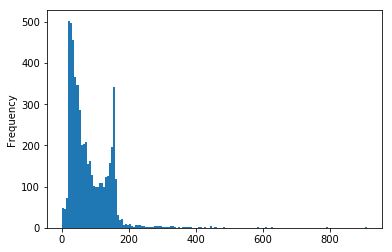

In [24]:
messages["length"].plot.hist(bins=150)

In [25]:
messages["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022385164400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002238526B518>], dtype=object)

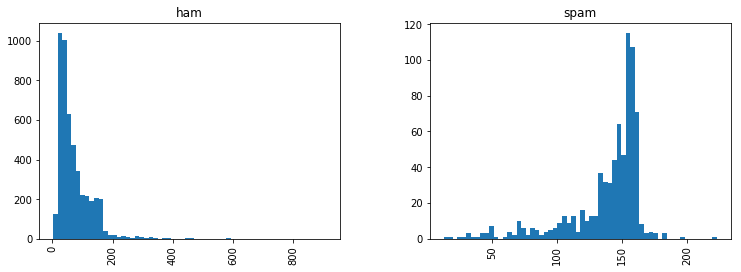

In [27]:
 messages.hist(column="length",by="label",bins=60,figsize=(12,4))

In [29]:
#Remove punctuation and check stopwords
mess = "Sample message!! Notice: this dude has punctuation." #sample to illustrate function
nopunc = [c for c in mess if c not in string.punctuation]

In [32]:
stopwords.words("english") #check out english stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
nopunc = "".join(nopunc)
nopunc

'Sample message Notice this dude has punctuation'

In [34]:
nopunc.split()

['Sample', 'message', 'Notice', 'this', 'dude', 'has', 'punctuation']

In [35]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]

In [42]:
#Define functions for the above illustration
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]
    return clean_mess

In [43]:
messages["messages"].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [44]:
#Use the text processing to vectorize the messages
#Bag of words: 1) count #words in msg, 2)weigh counts, 3)normalize vectors 
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages["messages"])

In [45]:
print(len(bow_transformer.vocabulary_))

11425


In [47]:
#Check transform
mess4 = messages["messages"][3]
print(mess4)

U dun say so early hor... U c already then say...


In [48]:
bow4=bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [49]:
bow_transformer.get_feature_names()[9554] #say

'say'

In [50]:
#Check how this is a sparse matrix
messages_bow = bow_transformer.transform(messages["messages"])

In [51]:
print("Shape of matrix: ", messages_bow.shape)

Shape of matrix:  (5572, 11425)


In [52]:
messages_bow.nnz #nonzeros

50548

In [54]:
#Extract the inverse document frequency and get vectors
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
print(tfidf_transformer.transform(bow4)) #check weights

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [58]:
tfidf_transformer.idf_[bow_transformer.vocabulary_["university"]] #get inverse document frequency for a word

8.527076498901426

In [59]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [61]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages["label"])

In [62]:
from sklearn.cross_validation import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(messages["messages"],messages["label"],test_size=0.3)

C:\Users\Ruthberg\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
#Create a processing pipeline
from sklearn.pipeline import Pipeline

In [64]:
pipeline = Pipeline([
    ("bow",CountVectorizer(analyzer=text_process)),
    ("tfidf",TfidfTransformer()),
    ("classifier",MultinomialNB())
])

In [65]:
pipeline.fit(msg_train,label_train) #Fit pipeline object

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000223857D7620>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [66]:
predictions = pipeline.predict(msg_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98      1446
       spam       0.99      0.69      0.82       226

avg / total       0.96      0.96      0.95      1672

